<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/%E3%80%8Ccifar10_cnn_gap_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = ["ariplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck"
      ]

truck


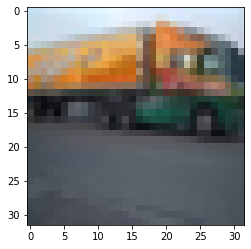

In [4]:
# mnist: (60000, ) [5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
  # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
  Conv2D(64,3, activation="relu", padding="same", input_shape=(32,32,3)),
  MaxPooling2D(),
  # 3 * 3 * 64(一個) * 128 + 128(bias) =  73856
  Conv2D(128,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(256,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  Conv2D(512,3, activation="relu", padding="same"),
  MaxPooling2D(),
  GlobalAveragePooling2D(),
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer=Adam(),
        metrics=["accuracy"])

In [7]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split : 切出一些驗證資料來做驗證(0.1:54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小:200, 圖片大:20)
# 200batch, 10epochs: 54000 * 10 / 200 -> 2700次(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callback = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
      y_train,
      validation_split=0.1,
      epochs=30,
      batch_size=200,
      verbose=2,
      callbacks=callback)

Epoch 1/30
225/225 - 980s - loss: 1.7250 - accuracy: 0.3503 - val_loss: 1.2637 - val_accuracy: 0.5386
Epoch 2/30
225/225 - 969s - loss: 1.1756 - accuracy: 0.5766 - val_loss: 0.9653 - val_accuracy: 0.6592
Epoch 3/30
225/225 - 981s - loss: 0.9211 - accuracy: 0.6739 - val_loss: 0.9496 - val_accuracy: 0.6794
Epoch 4/30
225/225 - 980s - loss: 0.7448 - accuracy: 0.7394 - val_loss: 0.7377 - val_accuracy: 0.7460
Epoch 5/30
225/225 - 952s - loss: 0.6077 - accuracy: 0.7880 - val_loss: 0.7139 - val_accuracy: 0.7582
Epoch 6/30
225/225 - 949s - loss: 0.4922 - accuracy: 0.8296 - val_loss: 0.6850 - val_accuracy: 0.7790
Epoch 7/30
225/225 - 951s - loss: 0.3949 - accuracy: 0.8631 - val_loss: 0.7151 - val_accuracy: 0.7650
Epoch 8/30
225/225 - 938s - loss: 0.2943 - accuracy: 0.8974 - val_loss: 0.7391 - val_accuracy: 0.7718
Epoch 9/30
225/225 - 959s - loss: 0.2201 - accuracy: 0.9236 - val_loss: 0.8500 - val_accuracy: 0.7608
Epoch 10/30
225/225 - 965s - loss: 0.1642 - accuracy: 0.9444 - val_loss: 0.8813 - 

In [9]:
model.evaluate(x_test_norm, y_test) # 測試資料預測

313/313 [==============================] - 19s 61ms/step - loss: 0.7237 - accuracy: 0.7578


[0.7236990332603455, 0.7577999830245972]

In [11]:
print(y_test.shape)
# print(pre.shape)
# -1:叫他幫你算 10000*1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)


In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# predict_proba -> predict
# predict -> predict_classes
# model.predict(x_test_norm)
pre = model.predict_classes(x_test_norm)
# 只要在 tensorflow: 就帶 one-hot -> y_test_cat
# 不在: 帶原本 -> y_test
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(names[i]) for i in range(10)],
      index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,ariplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
ariplane(正確),822,13,22,14,11,2,10,9,67,30
automobile(正確),19,883,1,4,1,5,2,3,23,59
bird(正確),77,6,613,61,102,49,52,23,10,7
cat(正確),34,11,44,565,68,149,65,35,12,17
deer(正確),25,3,40,47,753,29,43,51,8,1
dog(正確),21,8,30,159,61,638,28,42,6,7
frog(正確),7,8,34,58,40,11,823,2,11,6
horse(正確),17,4,27,31,71,48,3,787,2,10
ship(正確),53,27,4,14,2,2,4,3,871,20
truck(正確),34,81,7,8,3,5,7,13,19,823


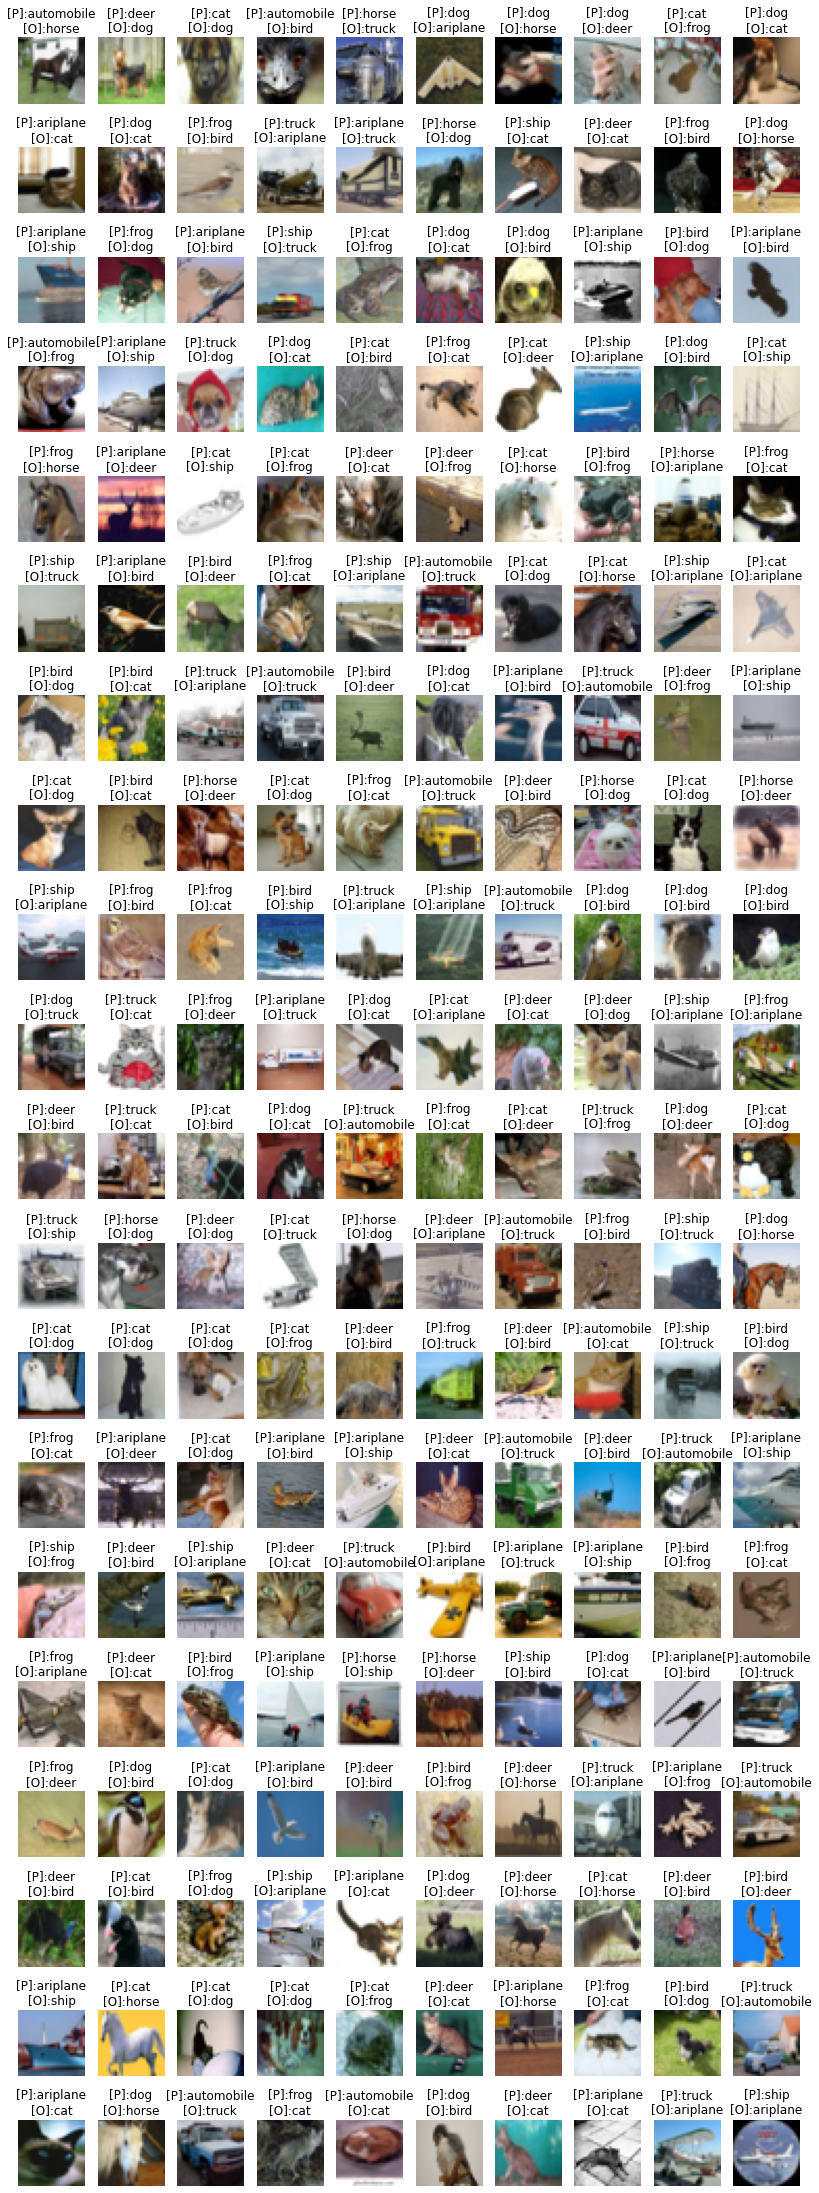

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.nonzero([[0,2,0],  # 判斷第幾個list,第幾個位置zero
      [0,0,3]])
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_pre = pre[idx]
false_label = y_test_r[idx]
false_img = x_test[idx]

plt.figure(figsize=(14,42))
width = 10
height= len(idx) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])